Seleccionar versiones tensorflow 1 y keras 2.1.0

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip3 uninstall -y keras
!pip3 install keras==2.1.0

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 307kB 5.3MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


### Instalacion Mask R-CNN
Clonar el git del repositorio https://github.com/matterport/Mask_RCNN 

Instalar dependencias 

Ejecutar instalacion

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN
!pip3 install -r requirements.txt
!python3 setup.py install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.85 MiB | 34.17 MiB/s, done.
Resolving deltas: 100% (563/563), done.
/content/Mask_RCNN
     |████████████████████████████████| 204kB 8.8MB/s 
     |████████████████████████████████| 163kB 15.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=f843c6d6321db404a327cb49db5fbe8f77c391c19a4aca2de0c286b3f5287f94
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.t

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/Mask_RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Mask_RCNN/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2

Importar librerias

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import random
import time
import cv2
import os
import sys
import math
import tensorflow as tf
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import xml.etree.ElementTree as ET

Using TensorFlow backend.


### Descargar modelos de pesos
Matterport Mask_RCNN proporciona modelos previamente entrenados para el conjunto de datos COCO.

En este caso, usaremos el modelo previamente entrenado en el conjunto de datos COCO.

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


### Creando objeto de configuración
MaskRCNN tiene una clase de configuración (Config). Define propiedades tanto para el entrenamiento como para la predicción, incluido el número de clases y la tasa de aprendizaje.

Ya existe una configuración disponible para el conjunto de datos COCO que solo necesita modificarse ligeramente para la inferencia.

Para el entrenamiento, necesitamos cambiar al menos dos propiedades. NAME y NUM_CLASSES.

In [ ]:
class GleasonConfig(Config):
    # Give the configuration a recognizable name
    NAME = "Gleason_segmentation"
    
    NUM_CLASSES = 1 + 4

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = GleasonConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

### Dataset

In [ ]:
!pwd 

/content/Mask_RCNN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Datos/Gleason")
!pwd

/content/drive/My Drive/Datos/Gleason


### Cargar datos
Método **load_dataset** definirá todas las clases y agregará todas las imágenes usando el add_imagemétodo. 

**load_mask** cargará las máscaras para una imagen determinada.

**image_reference** devolverá la ruta a una imagen dada su identificación.

In [ ]:
class GleasonDataset(utils.Dataset):
    def load_dataset(self, dataset_dir):
        self.add_class('dataset', 1, 'verde')
        self.add_class('dataset', 2, 'azul')
        self.add_class('dataset', 3, 'amarillo')
        self.add_class('dataset', 4, 'rojo')

        # find all images
        for i, filename in enumerate(os.listdir(dataset_dir)):
            if '.jpg' in filename:
                self.add_image('dataset', 
                               image_id=i, 
                               path=os.path.join(dataset_dir, filename), 
                               annotation=os.path.join(dataset_dir, filename.replace('.jpg', '.json')))
    
    def extract_masks(self, filename):
        json_file = os.path.join(filename)
        with open(json_file) as f:
            img_anns = json.load(f)
            
        masks = np.zeros([3100, 3100, len(img_anns['shapes'])], dtype='uint8')
        classes = []
        for i, anno in enumerate(img_anns['shapes']):
            mask = np.zeros([3100, 3100], dtype=np.uint8)
            cv2.fillPoly(mask, np.array([anno['points']], dtype=np.int32), 1)
            masks[:, :, i] = mask
            classes.append(self.class_names.index(anno['label']))
        return masks, classes
 
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        masks, classes = self.extract_masks(path)
        return masks, np.asarray(classes, dtype='int32')
    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

Crear datos de entrenamiento y de test

In [ ]:
# Create training and validation set
# train set
dataset_train = GleasonDataset()
dataset_train.load_dataset('gray_train')
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))
 
# test/val set
dataset_val = GleasonDataset()
dataset_val.load_dataset('gray_test')
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))

Train: 623
Test: 237


Cargar y mostrar algunos ejemplos de imágenes con sus máscaras

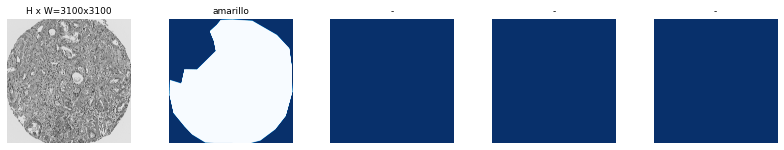

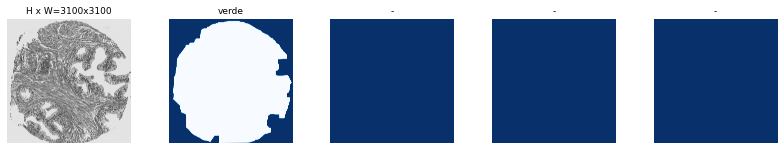

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 2)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

### Creación y entrenamiento del modelo

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


Definir pesos, en este caso iniciamos con los pesos previamente entrenados de COCO

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

## Training

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=20, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/logs/gleason_segmentation20200831T1644/mask_rcnn_gleason_segmentation_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistribu

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/20
 999/1000 [============================>.] - ETA: 0s - loss: 1.8200 - rpn_class_loss: 0.0392 - rpn_bbox_loss: 0.9539 - mrcnn_class_loss: 0.1145 - mrcnn_bbox_loss: 0.3100 - mrcnn_mask_loss: 0.4023

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



1000/1000 [==============================] - 710s 710ms/step - loss: 1.8203 - rpn_class_loss: 0.0392 - rpn_bbox_loss: 0.9540 - mrcnn_class_loss: 0.1145 - mrcnn_bbox_loss: 0.3102 - mrcnn_mask_loss: 0.4023 - val_loss: 1.5354 - val_rpn_class_loss: 0.0178 - val_rpn_bbox_loss: 0.7302 - val_mrcnn_class_loss: 0.1481 - val_mrcnn_bbox_loss: 0.2624 - val_mrcnn_mask_loss: 0.3769
Epoch 2/20
1000/1000 [==============================] - 597s 597ms/step - loss: 1.4166 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.7786 - mrcnn_class_loss: 0.0946 - mrcnn_bbox_loss: 0.1868 - mrcnn_mask_loss: 0.3298 - val_loss: 1.4842 - val_rpn_class_loss: 0.0198 - val_rpn_bbox_loss: 0.7236 - val_mrcnn_class_loss: 0.1456 - val_mrcnn_bbox_loss: 0.2428 - val_mrcnn_mask_loss: 0.3523
Epoch 3/20
1000/1000 [==============================] - 598s 598ms/step - loss: 1.2745 - rpn_class_loss: 0.0257 - rpn_bbox_loss: 0.6482 - mrcnn_class_loss: 0.1020 - mrcnn_bbox_loss: 0.1788 - mrcnn_mask_loss: 0.3196 - val_loss: 1.2162 - val_rpn_cl

In [1]:
import numpy as np
x=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
y=np.array([1.8203, 1.4166,1.2745,1.1331,1.1282,1.0331,1.0178,0.9445,0.9170,0.8643, 0.8468,0.7958,0.7707,0.7454,0.7091,0.6859, 0.6491,0.6278,0.5820,0.5922 ])
x=np.array(x)
y=np.array(y)
print(len(x), len(y))



20 20


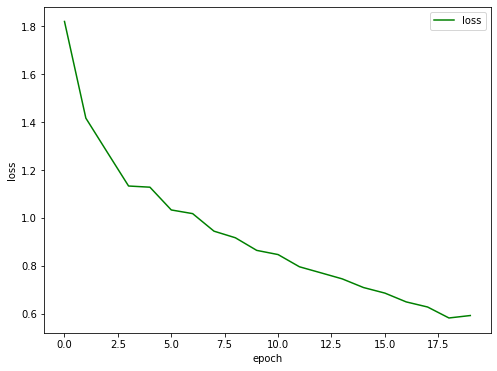

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
plt.plot(x, y, label='loss',color='green')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## Detection

Evaluación del modelo en el conjunto de prueba.

Podemos evaluar el modelo entrenado haciendo predicciones en el conjunto de datos de prueba.

In [ ]:
class InferenceConfig(GleasonConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/logs/gleason_segmentation20200831T1644/mask_rcnn_gleason_segmentation_0020.h5
Re-starting from epoch 20


In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

### Original mask

original_image           shape: (1024, 1024, 3)       min:   23.00000  max:  252.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max: 3100.00000  float64
gt_class_id              shape: (2,)                  min:    2.00000  max:    3.00000  int32
gt_bbox                  shape: (2, 4)                min:   46.00000  max:  992.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


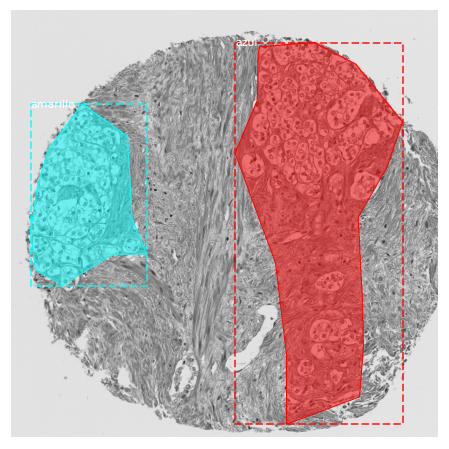

class:  [3 2]


In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
print("class: ",gt_class_id)

### Predicted mask

Processing 1 images
image                    shape: (1024, 1024, 3)       min:   23.00000  max:  252.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -100.70000  max:  148.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
class_id:  [3 2 2]


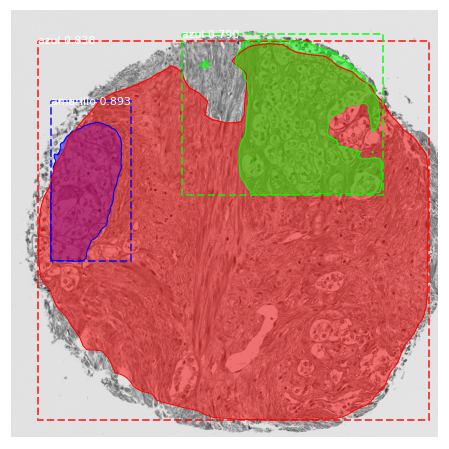

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
print("class_id: ", r['class_ids'])

### Original mask

original_image           shape: (1024, 1024, 3)       min:   23.00000  max:  248.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max: 3100.00000  float64
gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:   44.00000  max: 1015.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


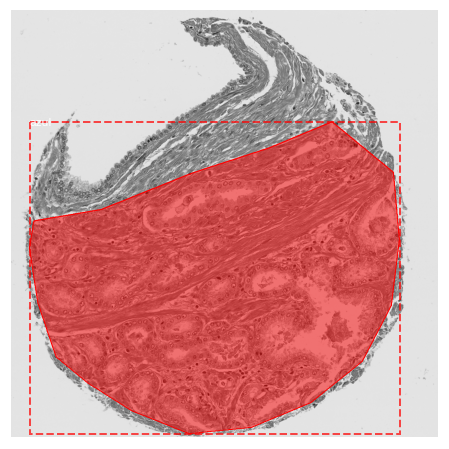

class:  [2]


In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
print("class: ",gt_class_id)

### Predicted mask

Processing 1 images
image                    shape: (1024, 1024, 3)       min:   23.00000  max:  248.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -100.70000  max:  144.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
class_id:  [1 2]


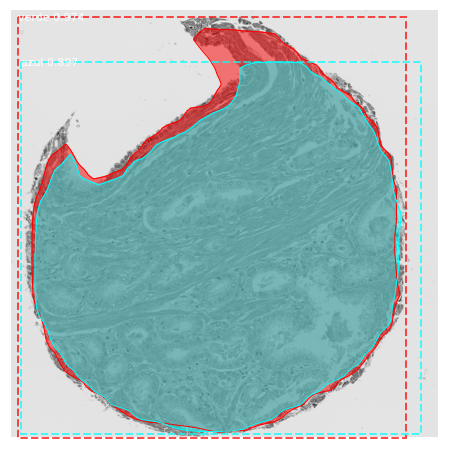

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
print("class_id: ", r['class_ids'])

### Original mask

original_image           shape: (1024, 1024, 3)       min:   18.00000  max:  247.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max: 3100.00000  float64
gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:   28.00000  max: 1018.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


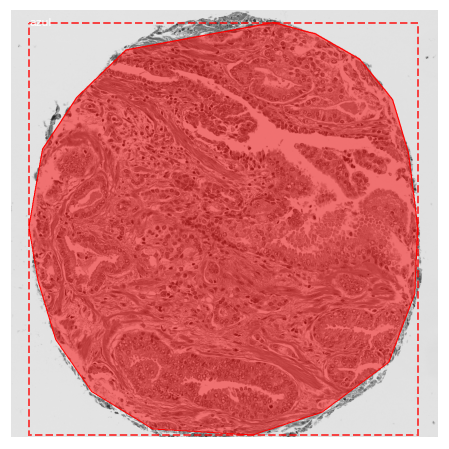

class:  [2]


In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
print("class: ",gt_class_id)

### Predicted mask

Processing 1 images
image                    shape: (1024, 1024, 3)       min:   18.00000  max:  247.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -105.70000  max:  143.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
class_id:  [2 2 2]


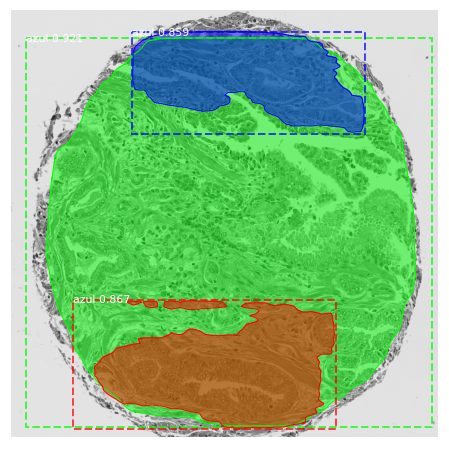

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
print("class_id: ", r['class_ids'])

### Original mask

original_image           shape: (1024, 1024, 3)       min:   22.00000  max:  246.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max: 3100.00000  float64
gt_class_id              shape: (2,)                  min:    2.00000  max:    3.00000  int32
gt_bbox                  shape: (2, 4)                min:   13.00000  max:  986.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


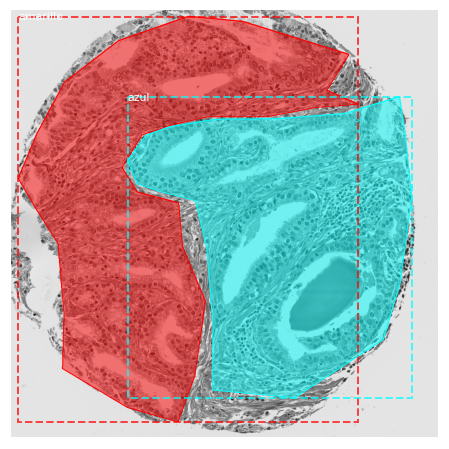

class:  [3 2]


In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
print("class: ",gt_class_id)

### Predicted mask

Processing 1 images
image                    shape: (1024, 1024, 3)       min:   22.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -101.70000  max:  142.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
class_id:  [3 2]


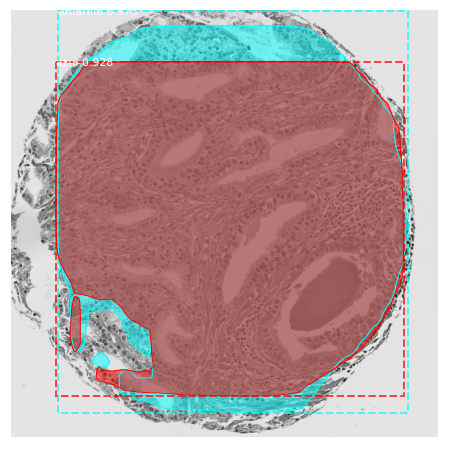

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
print("class_id: ", r['class_ids'])

### Original mask

original_image           shape: (1024, 1024, 3)       min:   23.00000  max:  246.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max: 3100.00000  float64
gt_class_id              shape: (1,)                  min:    3.00000  max:    3.00000  int32
gt_bbox                  shape: (1, 4)                min:   40.00000  max: 1024.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


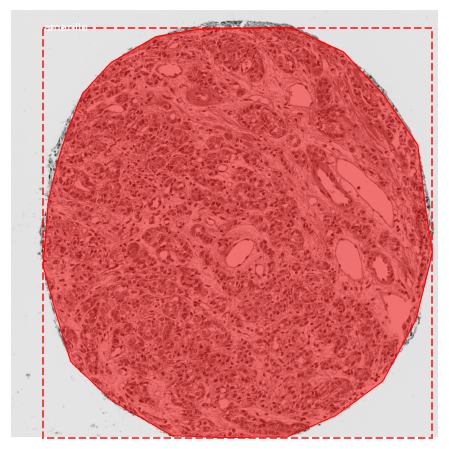

class:  [3]


In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
print("class: ",gt_class_id)

### Predicted mask

Processing 1 images
image                    shape: (1024, 1024, 3)       min:   23.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -100.70000  max:  142.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
class_id:  [3 4 2]


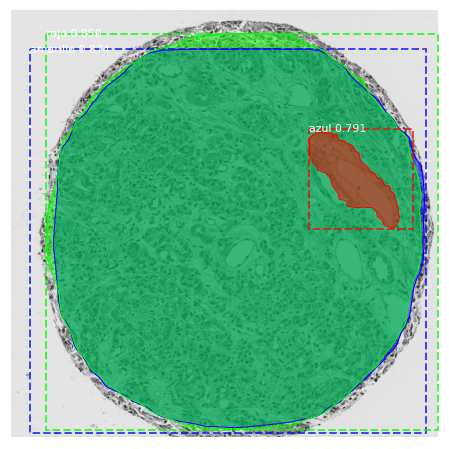

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
print("class_id: ", r['class_ids'])

### Original mask

original_image           shape: (1024, 1024, 3)       min:   22.00000  max:  246.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max: 3100.00000  float64
gt_class_id              shape: (1,)                  min:    4.00000  max:    4.00000  int32
gt_bbox                  shape: (1, 4)                min:   47.00000  max: 1007.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


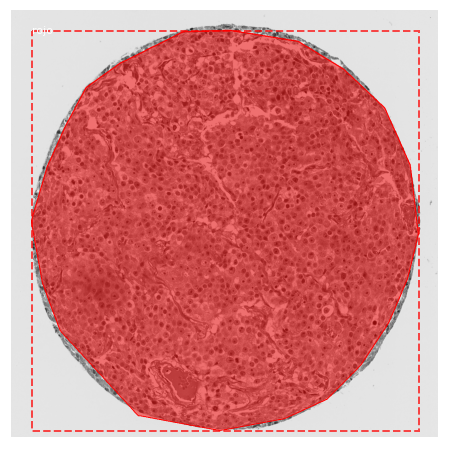

class:  [4]


In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
print("class: ",gt_class_id)

### Predicted Mask

Processing 1 images
image                    shape: (1024, 1024, 3)       min:   22.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -101.70000  max:  142.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
class_id:  [4]


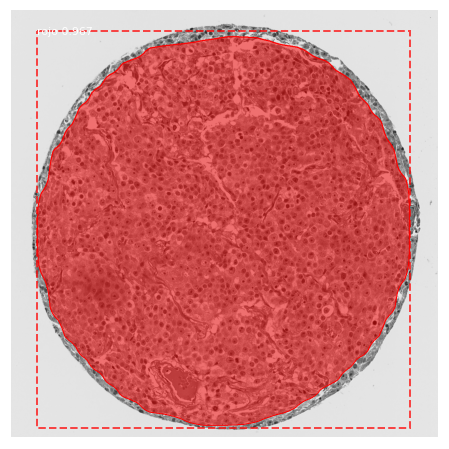

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
print("class_id: ", r['class_ids'])

## Evaluation

### mAP (Mean Average Precision)

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = dataset_val.image_ids
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.508579465742688


### IoU (Intersection over Union)

In [ ]:
# Compute IoU

image_ids = dataset_val.image_ids

IoUs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    overlaps =\
        utils.compute_overlaps_masks(gt_mask,r['masks'])
    IoUs.append(np.mean(overlaps))
    
print(IoUs)

In [ ]:
IoU = [x for x in IoUs if str(x) != 'nan']
IoU=np.mean(IoU)
print(IoU)

0.5978197
